In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud = pd.read_csv("/media/gargi/Data/DataSets/Fraud_check.csv")

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.rename(columns={'Taxable.Income': 'ti', 'City.Population': 'cp', 'Work.Experience': 'we'}, inplace=True)

In [5]:
fraud.describe

<bound method NDFrame.describe of     Undergrad Marital.Status     ti      cp  we Urban
0          NO         Single  68833   50047  10   YES
1         YES       Divorced  33700  134075  18   YES
2          NO        Married  36925  160205  30   YES
3         YES         Single  50190  193264  15   YES
4          NO        Married  81002   27533  28    NO
..        ...            ...    ...     ...  ..   ...
595       YES       Divorced  76340   39492   7   YES
596       YES       Divorced  69967   55369   2   YES
597        NO       Divorced  47334  154058   0   YES
598       YES        Married  98592  180083  17    NO
599        NO       Divorced  96519  158137  16    NO

[600 rows x 6 columns]>

In [6]:
fraud["ti"] = pd.cut(fraud["ti"], bins =[10000,30000,100000],labels = ["Risky","Good"] )

In [7]:
fraud

,Undergrad,Marital.Status,ti,cp,we,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [8]:
label_encoder = preprocessing.LabelEncoder()
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status']) 

In [9]:
label_encoder = preprocessing.LabelEncoder()
fraud['ti']= label_encoder.fit_transform(fraud['ti']) 

In [10]:
label_encoder = preprocessing.LabelEncoder()
fraud['Urban']= label_encoder.fit_transform(fraud['Urban']) 

In [11]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad']) 

In [12]:
fraud

,Undergrad,Marital.Status,ti,cp,we,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [13]:
x=fraud[['Undergrad','Marital.Status','cp','we','Urban']]
y=fraud[['ti']]

In [14]:
x

,Undergrad,Marital.Status,cp,we,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [15]:
y

,ti
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [16]:
fraud['ti'].unique()

array([0, 1])

In [17]:
fraud.ti.value_counts()

0    476
1    124
Name: ti, dtype: int64

In [18]:
colnames = list(fraud.columns)
colnames

['Undergrad', 'Marital.Status', 'ti', 'cp', 'we', 'Urban']

In [32]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.4,random_state=80)

# Building Decision Tree Classifier using Entropy Criteria

In [43]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

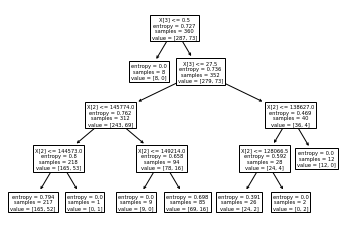

In [44]:
tree.plot_tree(model);

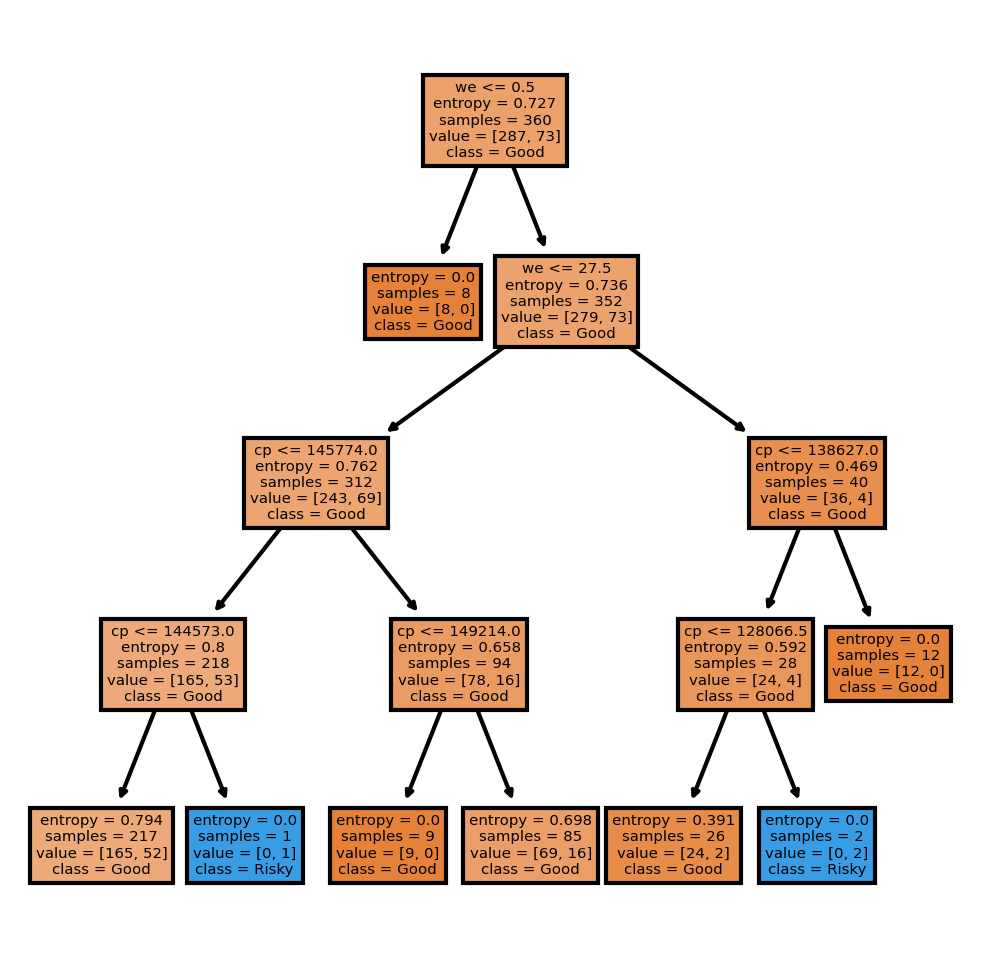

In [45]:
fn=[
 'Undergrad','Marital.Status','cp','we','Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [46]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    238
1      2
dtype: int64

In [47]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])